In [1]:

# Set up matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from astropy.io import fits

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: erfa version 1.7 or later must be installed to use Astropy. erfa is not installed.

In [3]:
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

In [5]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: C:\Users\norma\.astropy\cache\download\py3\2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [7]:
image_data = hdu_list[0].data
image_data.shape

(893, 891)

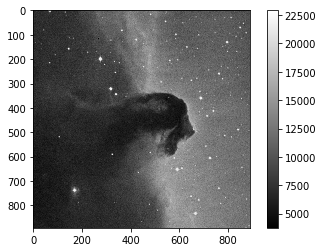

In [13]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

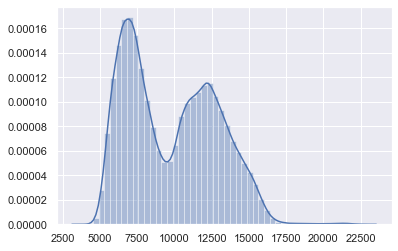

In [17]:
sns.distplot(image_data.flatten())

### Displaying image with a logarithmic scale

In [18]:
from matplotlib.colors import LogNorm

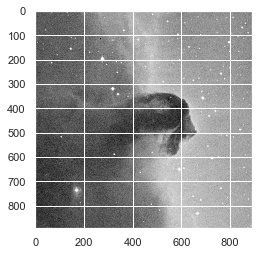

In [19]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())

### Image stacking

In [21]:
base_url = 'http://data.astropy.org/tutorials/FITS-images/M13_blue_{0:04d}.fits'

image_list = [download_file(base_url.format(n), cache=True) for n in range (1, 6)]
image_concat = [fits.getdata(image) for image in image_list]

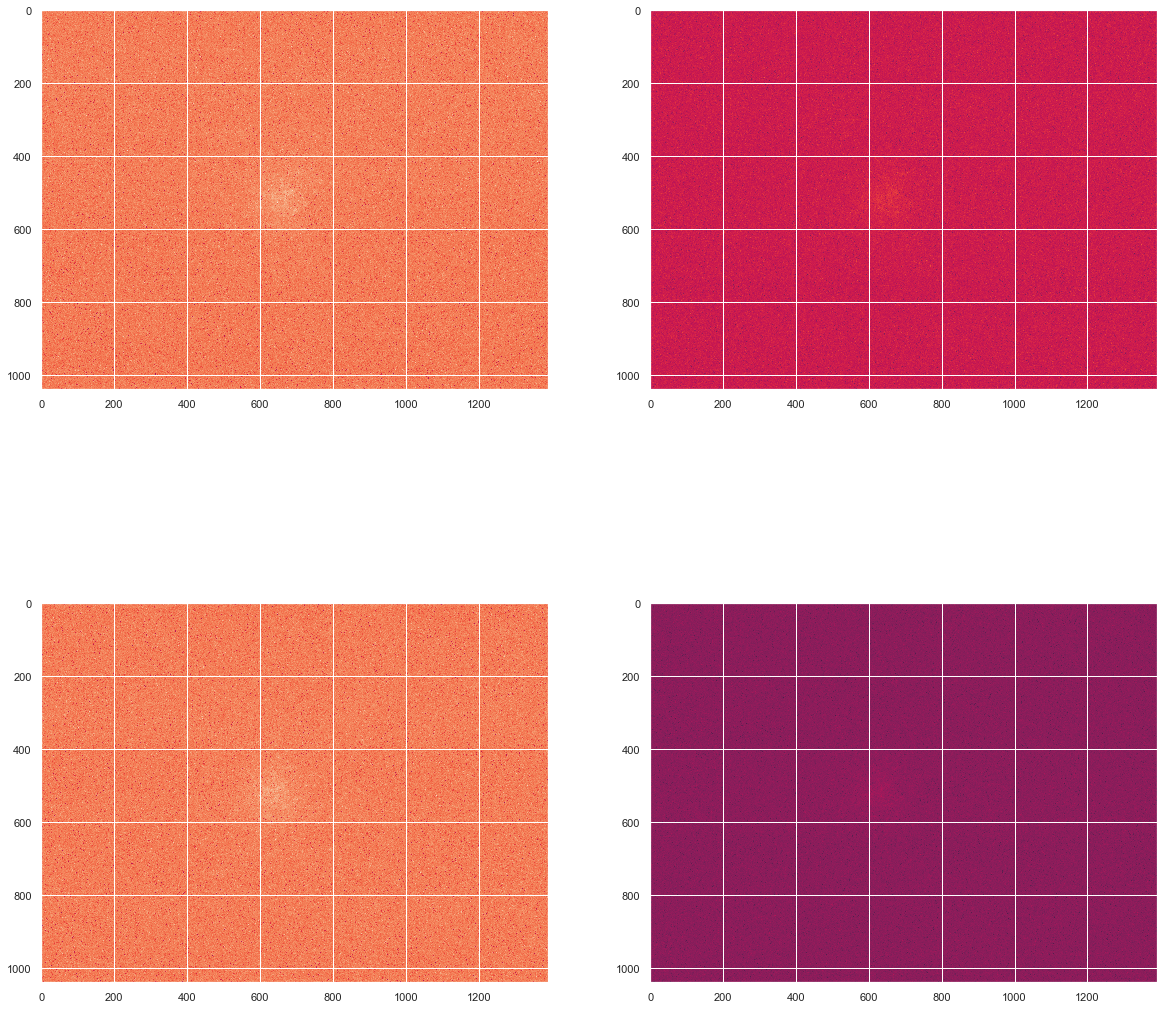

In [24]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(image_concat[i])

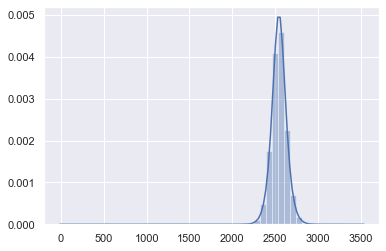

In [25]:
final_image = np.zeros(shape = image_concat[0].shape)
for image in image_concat:
    final_image += image

sns.distplot(final_image.flatten())

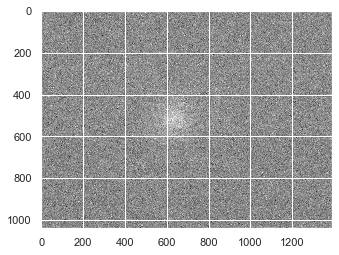

In [28]:
plt.imshow(final_image, cmap='gray', vmin=2E3, vmax=3E3)